### Bike Sharing Assignment 
#### Problem Statement :-
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

In [117]:
# Required Libraries for this assignment.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# For REF and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### Reading and understanding the Data


In [124]:
#Read Data from file
df = pd.read_csv('C:/Users/HP/Desktop/upgrad/Bike_case_study/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [125]:
df.shape

(730, 16)

In [126]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [127]:
#checking null value on every column  and their count
count_null=df.isnull().sum()

In [130]:
print(count_null)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [131]:
#Print the datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Only One Variable data type is object rest are int and float type data.
#### instant column is record index which doenot have any significance in data analysis so we drop the instant.

In [132]:
#instant coulmn looks like index in given data so we can drop it
df.drop(['instant'],axis=1,inplace=True)

In [133]:
#print data for 10 rows
df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [134]:
# derived weekday ,yr,mnth from dteday so drop dteday 
df.drop(['dteday'],axis=1,inplace=True)

In [135]:
#sum of casual and registered is same as cnt , and cnt is target value so drop casual and registered
df.drop(['casual','registered'],axis=1,inplace=True)

In [136]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [137]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


(730, 12)

In [138]:
#season, yr,mnth,holiday,weekday,workingday & weathersit is categorical variable 

#convert dtype of  categorical variable 

cat_vars =['mnth','season','holiday','weekday','weathersit','workingday','yr']

df[cat_vars]=df[cat_vars].astype('category')

num_var=['temp','atemp','hum','windspeed','cnt']
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


In [139]:
#get the insight of categorical values
df.describe(include=['category'])

,season,yr,mnth,holiday,weekday,workingday,weathersit
count,730,730,730,730,730,730,730
unique,4,2,12,2,7,2,3
top,3,0,1,0,0,1,1
freq,188,365,62,709,105,499,463


In [140]:
#get the insight of numerical  values
df.describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


In [141]:
#so we will replace weekday,season,weathersit and mnth  with appropriate values
df['weekday'].replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'},inplace=True)
df['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)
df['weathersit'].replace({1: 'Clear',2:'Cloudy',3: 'Light_Rain',4: 'Thunderstorm'},inplace=True)
df['mnth'].replace({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'},inplace=True)

### Data Visualisation



In [142]:
# get the information about data before analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    object  
 1   yr          730 non-null    category
 2   mnth        730 non-null    object  
 3   holiday     730 non-null    category
 4   weekday     730 non-null    object  
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    object  
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(1), object(4)
memory usage: 54.0+ KB


In [143]:
#convert all nemerical values with appropriate data type
#df[['temp','atemp','hum','windspeed','cnt']]=df[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)

In [144]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


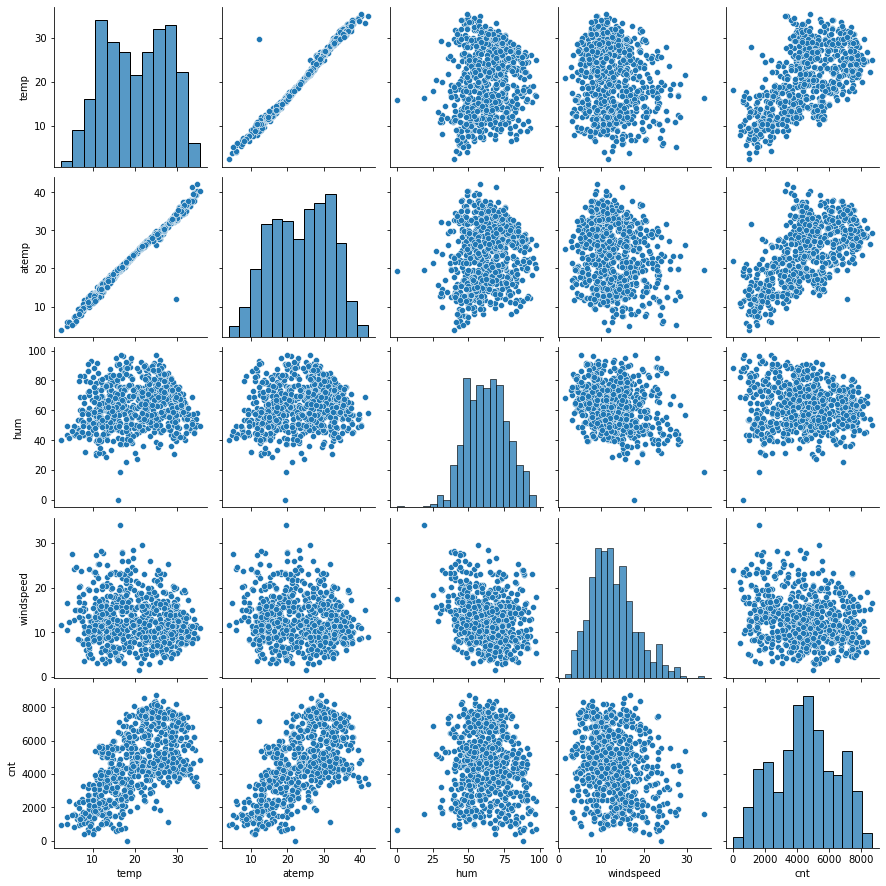

In [145]:
# Performing EDA
#Analysis the numeric variables plots

sns.pairplot(df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

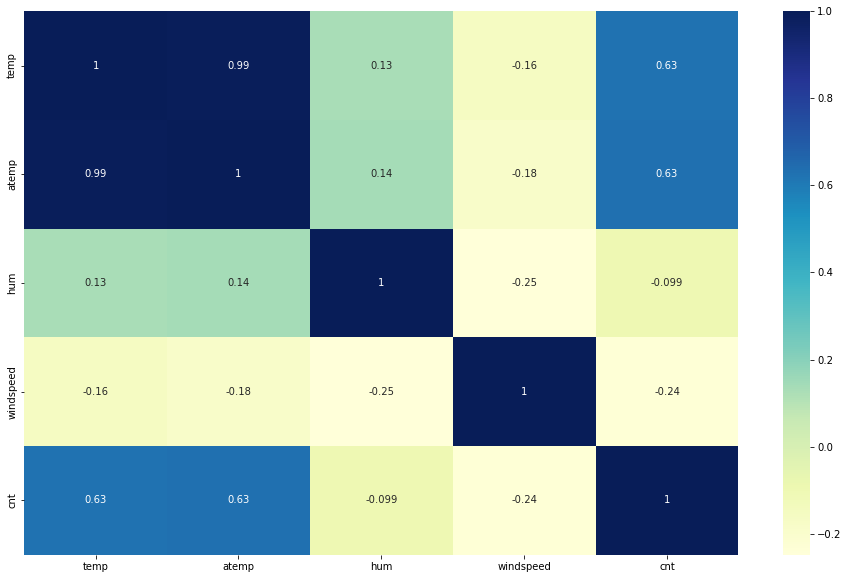

In [22]:
#According to plot we can say that there is relation between temp and atemp
#create a heatmap
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(),  annot=True, cmap="YlGnBu")
plt.show()

In [146]:
#correlation between temp and atemp is 0.99 which is almost 1 so we can drop atemp and consider temp for further analysis
df.drop(['atemp'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


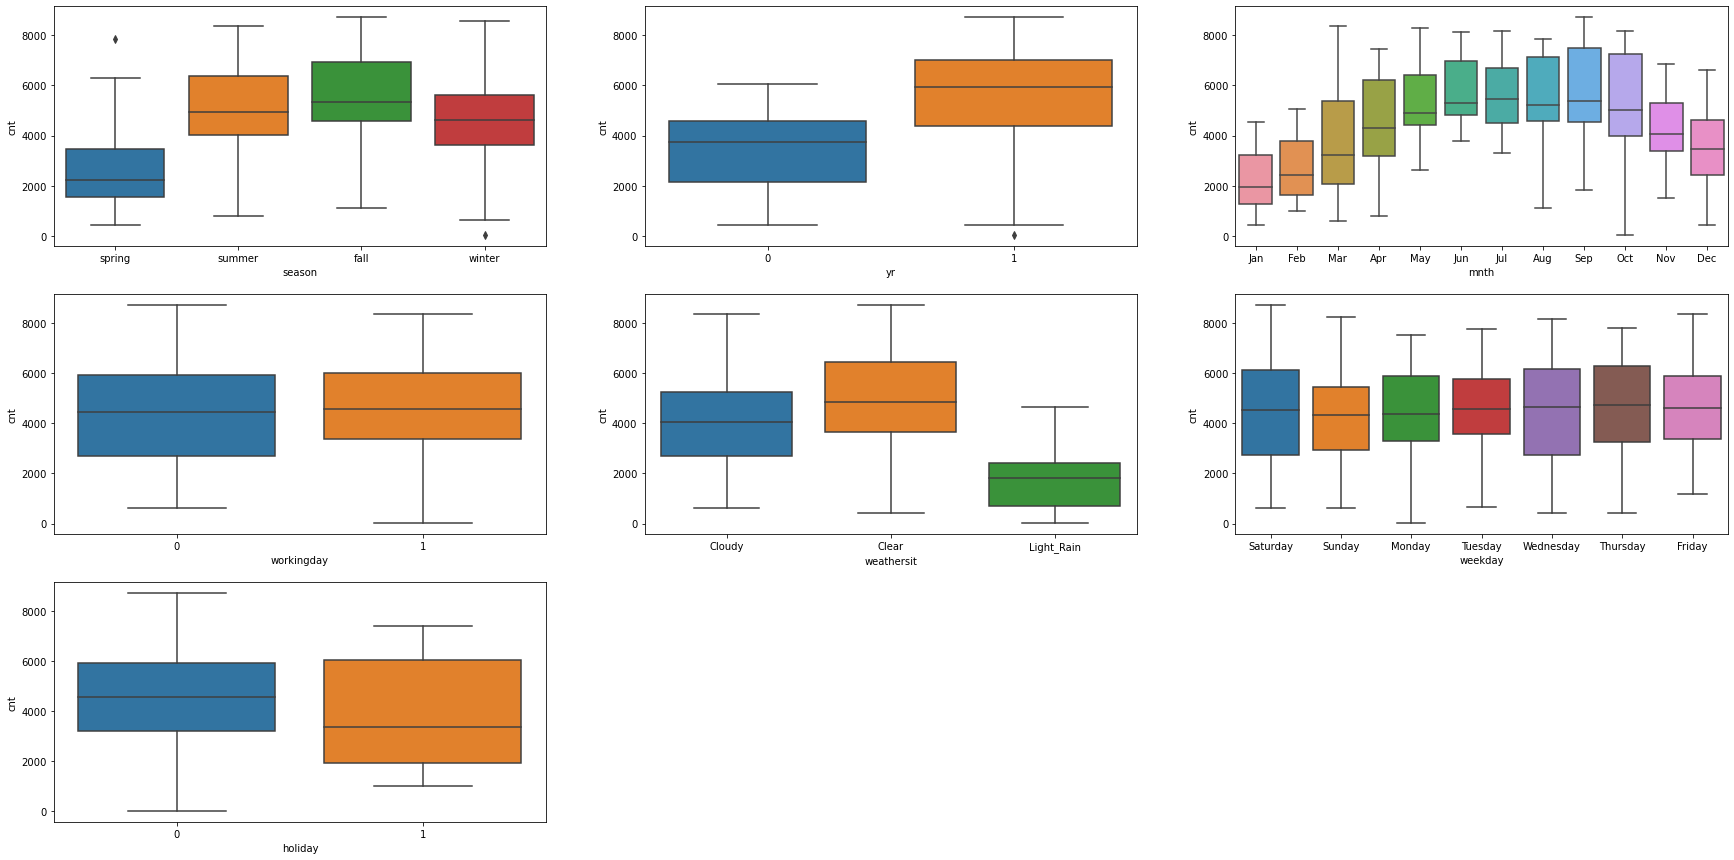

In [147]:
#visualising categorical data with target data
plt.figure(figsize = (30,15))
plt.subplot(3,3,1)
sns.boxplot(x ='season', y='cnt', data=df)
plt.subplot(3,3,2)
sns.boxplot(x ='yr', y='cnt', data=df)
plt.subplot(3,3,3)
sns.boxplot(x ='mnth', y='cnt', data=df)
plt.subplot(3,3,4)
sns.boxplot(x ='workingday', y='cnt', data=df)
plt.subplot(3,3,5)
sns.boxplot(x ='weathersit', y='cnt', data=df)
plt.subplot(3,3,6)
sns.boxplot(x ='weekday', y='cnt', data=df)
plt.subplot(3,3,7)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.show()


#### Data Preparation

In [148]:
###Preparing Data for Modeling
    #-Encoding
#Yes/NoVariable
#Dummy Variable

In [149]:
#Creating dummy variables for categorical
season_name=pd.get_dummies(df[['season']],drop_first=True)
week_of_day=pd.get_dummies(df[['weekday']],drop_first=True)
month_name=pd.get_dummies(df[['mnth']],drop_first=True)
weathersit_status=pd.get_dummies(df[['weathersit']],drop_first=True)



In [150]:
#concate the dummy variable with original df 

df=pd.concat([df,season_name],axis=1)
df=pd.concat([df,weathersit_status],axis=1)
df=pd.concat([df,week_of_day],axis=1)
df=pd.concat([df,month_name],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   season                 730 non-null    object  
 1   yr                     730 non-null    category
 2   mnth                   730 non-null    object  
 3   holiday                730 non-null    category
 4   weekday                730 non-null    object  
 5   workingday             730 non-null    category
 6   weathersit             730 non-null    object  
 7   temp                   730 non-null    float64 
 8   hum                    730 non-null    float64 
 9   windspeed              730 non-null    float64 
 10  cnt                    730 non-null    int64   
 11  season_spring          730 non-null    uint8   
 12  season_summer          730 non-null    uint8   
 13  season_winter          730 non-null    uint8   
 14  weathersit_Cloudy      730 non-null    uin

In [151]:
#Deleting original columns
df.drop(['season'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)
df.drop(['weekday'],axis=1,inplace=True)
df.drop(['mnth'],axis=1,inplace=True)

In [152]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [153]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [154]:
#Data is ready for spliting
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3 ,random_state=100)

# data structure for train data frame
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
# test data frame structure
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [33]:
#train dataframe shape
print(df_train.shape)

(510, 29)


In [34]:
#test dataframe shape
print(df_test.shape)

(219, 29)


In [35]:
#train data set columns information
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'weathersit_Cloudy',
       'weathersit_Light_Rain', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sep'],
      dtype='object')

In [36]:
#Rescaling the features
#1.Intantiate an object
scaler=MinMaxScaler()

In [37]:
#Create a list of numeric vars
num_vars = ['temp','hum','windspeed','cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [38]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df_train.describe()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Cloudy,weathersit_Light_Rain,weekday_Monday,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.343137,0.029412,0.150980,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.475223,0.169124,0.358381,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
#Training the Model
#Create X_train, y_train
y_train=df_train.pop('cnt')
X_train=df_train

In [41]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weathersit_Cloudy,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [42]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

### Data Modelling and Evaluation

In [64]:
#Using RFE arroach for feature selection


# create object

lm=LinearRegression()

# fit model
lm.fit(X_train, y_train)

#Take 15 variables from data so we can create model with mixed approach
rfe=RFE(lm,10)
rfe=rfe.fit(X_train,y_train)

#colums whcih are consider for training analysis
col=X_train.columns[rfe.support_]
col


Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'weathersit_Light_Rain', 'mnth_Jul', 'mnth_Sep'],
      dtype='object')

In [81]:
#These columns are not consider in creating Model
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'weathersit_Cloudy', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct'],
      dtype='object')

### Building model using statmodel for ananlysis different statistics

In [86]:
# creating X_train_rfe with REF selected variables

X_train_rfe = X_train[col]

In [92]:
#Building Model using Statmodel
import statsmodels.api as sm

#def sm_linearmodel(X_train_sm):
    #add contant
X_train_lm=sm.add_constant(X_train_rfe)

# create a fitted model(1st model)
lm = sm.OLS(y_train,X_train_lm).fit()
   # return lm

In [93]:
# create 1st stats model and also see summary and VIF 


print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.53e-184
Time:                        19:56:30   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.37

In [85]:
#Insight :-
#    1.R score - 0.843 and Adj. R square is 0.839 adn all p values are less than 0.05 
#    2.caluculate VIF of all variables 

In [94]:
# Calculate VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X= X_train_rfe
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.18
2,temp,13.09
4,windspeed,4.02
5,season_spring,2.40
0,yr,2.06
6,season_winter,1.98
8,mnth_Jul,1.40
9,mnth_Sep,1.20
7,weathersit_Light_Rain,1.11
1,holiday,1.04


In [95]:
#Hum has high VIF so we can  drop it.
X_train_new=X_train_rfe.drop(['hum'],axis=1)

In [96]:
# create second stats model lm2 and look summary
    #add contant
X_train_lm=sm.add_constant(X_train_new)

# create a fitted model(1st model)
lm2 = sm.OLS(y_train,X_train_lm).fit()
print(lm2.summary())



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          5.33e-171
Time:                        19:58:34   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

In [97]:
vif = pd.DataFrame()
X= X_train_new
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.40
3,windspeed,3.98
0,yr,2.06
4,season_spring,1.61
5,season_winter,1.37
7,mnth_Jul,1.34
8,mnth_Sep,1.20
6,weathersit_Light_Rain,1.06
1,holiday,1.04


#### All VIF values are less than 5 so no need to drop any variable.
#### Model number lm2 gives good result .


In [98]:
#Residual Analysis
#Predict values 

y_train_cnt = lm2.predict(X_train_lm)

In [99]:
print(y_train_cnt)

653    0.692254
576    0.730260
426    0.512593
728    0.364708
482    0.602419
         ...   
526    0.784309
578    0.825398
53     0.182596
350    0.315411
79     0.354072
Length: 510, dtype: float64


Text(0, 0.5, 'density')

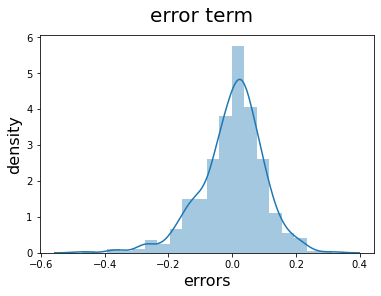

In [102]:
#plot histogram for the error term if error term are normally distrubuted(important assumption of Linera Regression)
fig =plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('error term', fontsize = 20)   # Graph title
plt.xlabel('errors', fontsize= 16)  # x-axis 
plt.ylabel('density', fontsize= 16)  # y-axis 

#### Residual distribution is showing as normal distribution which is around 0.

In [182]:
# Calculate Residuals
res = y_train - y_train_cnt

In [104]:
# Scale the test data(Prediction & Evaluation on the test data)
#Create alist of numeric values
#num_var=['temp','hum','windspeed','cnt']
df_test[num_vars]=scaler.fit_transform(df_test[num_vars])


In [105]:
# Create x and y set

y_test = df_test.pop('cnt')
X_test=df_test

In [108]:
#creating X_test_new after dropping variables of X_test
X_test_new = X_test[X_train_new.columns]

#adding a constant variable
X_test_new=sm.add_constant(X_test_new)

In [190]:
# Now we can start prediction
# Creating X_test_new data frame from X_train_new in which data are drop from X_train_rfe11(whixh is selected as good model)

#X_test_new = X_test[X_train_new.columns]

In [191]:
#Adding a constant for prediction
#X_test_new= sm.add_constant(X_test_new)

In [109]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'weathersit_Light_Rain', 'mnth_Jul', 'mnth_Sep'],
      dtype='object')

In [110]:
# Prediction based on chooosen model
y_pred = lm2.predict(X_test_new)

Text(0.5, 0, 'y_pred')

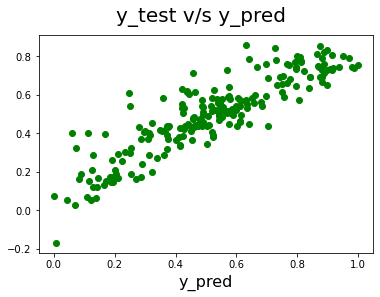

In [111]:
# Checking predicted and Test Data

fig = plt.figure()
plt.scatter(y_test, y_pred,color='g')
#plt.plot(y_test,y_pred,color='r')
fig.suptitle('y_test v/s y_pred', fontsize = 20)   # Graph title
plt.xlabel('y_test', fontsize= 16)  # x-axis 
plt.xlabel('y_pred', fontsize= 16)  # y-axis 

### We have good model which predicts the demand of bike. The actual and predicted cnt overlapped almost , thus indicates that model is explain thechange in demand as well.  

In [112]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [113]:
r_squared=r2_score(y_test, y_pred)
r_squared

0.7758490706014967

In [ ]:
# R square of our model is 80.8

In [203]:
X_train_new.head()

,yr,holiday,windspeed,spring,Cloudy,Light_Rain,3,5,6,8,9,Sunday,7,10
653,1,0,0.300794,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0.255342,1,1,0,1,0,0,0,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0.188475,0,1,0,0,0,0,0,0,0,0,0


In [114]:
print(X_train_new.columns)

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'weathersit_Light_Rain', 'mnth_Jul', 'mnth_Sep'],
      dtype='object')


In [115]:
#print again best model 
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          5.33e-171
Time:                        20:18:02   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

## The equation of the best fit line is :
### cnt =  0.2042+0.2350*yr -0.0862*holiday-+0.4758*temp-0.1325*windspeed-0.1032*season_spring+0.0504*season_winter-0.2562*weathersit_Light_Rain-0.0616*mnth_Jul+0.0498*mnth_Sep

## Conclusion :-
#### 1.  We can see that demand of Bike is mainly depend on yr,holiday,temp,windspeed,season_spring,season_winter,weathersit_Light_Rain,mnth_Jul and mnth_sep.
#### 2. Bike demand increases means cnt increase when all positive co efficient variable increase means yr,temp,season_winter,mnth_sept.
#### 3.   Bike demand decreases'cnt'  with negative co efficient which is holiday,windspeed,season_spring,weathersit_Light_Rain and mnth_Jul.
#### 4. temp variable is most significant variable for target variable cnt because it has highest coeffiecient.